In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

#Zbiór wygenerowany jak w pliku create_matrix_from_files, ale zawierający wszystkie kolumny
df = pd.read_csv("probna3.csv")

## IPCA (Incremental PCA):
Zamiennik PCA przy dużych zbiorach - robi mądrzej z pamięcią. Z tego co widzę to dzieli na warstwy (batch_size). <br>
Przy małych zbiorach pewnie nie będzie różnicy, ale przy większym wyniki mogą być już różne.

In [2]:
def ipca_fun(data, n_components, batch_size):

    #Usuwam nazwy plikow i kraje:
    df_new=df.iloc[:,1:df.shape[1]-1]
    
    ipca = IncrementalPCA(n_components=n_components, batch_size=batch_size)
    #n_components - do ilu wymiarów redukujemy (głupio, bo 2 to głupio, ale chciałam narysować)
    #batch_size - chyba ile obserwacji na raz w pamięci mieli jednocześnie? 
    ipca.fit(df_new)
    
    return(pd.DataFrame(ipca.transform(df_new)))

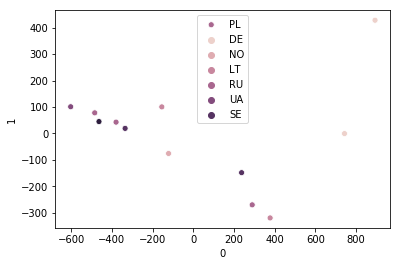

In [3]:
def ipca_plot2(df, batch_size):
    '''
    Wykres w przypadku redukcji do dwóch wymiarów
    '''
    new_data = ipca_fun(df,2,batch_size)
    
    #Zmieniam kody państw na liczby(kolory)
    le = preprocessing.LabelEncoder()
    le.fit(df["@C#ountry"])
    
    colors =  le.transform(df["@C#ountry"])

    scatt = sns.scatterplot(x=new_data[0], y=new_data[1], hue=colors, legend ="full")
    plt.legend(labels = df["@C#ountry"].unique())
    
ipca_plot2(df,6)

In [4]:
new_data = ipca_fun(df,2,6)
new_data

,0,1
0,-484.307808,77.864592
1,289.551244,-269.755283
2,-379.407410,42.649764
3,893.049735,427.726693
4,742.977237,-0.528789
5,377.602172,-319.214649
6,-154.697606,100.367038
7,-121.441020,-75.722219
8,-602.452936,100.877545
9,-463.345609,44.841829


In [5]:
def plot_R2(df, batch_size):
    '''
    Taki sam wykres jak wcześniej tylko w plotly
    '''
    new_data = ipca_fun(df,2,batch_size)
    new_data['@C#ountry']=df['@C#ountry']
    
    countries=new_data["@C#ountry"].unique()
    
    it = 0
    x,y,z=[],[],[]
    data= []
    for i in countries:
        country_data = new_data.loc[new_data["@C#ountry"] == i]
        x.append(country_data[0])
        y.append(country_data[1])

        trace = go.Scatter(
            x=x[it],
            y=y[it],
            name = i,
            mode='markers',
            marker=dict(
                size=12,
                line=dict(
                    color='rgba(217, 217, 217, 0.14)',
                    width=0.5
                ),
                opacity=0.8
            )
        )

        data.append(trace)
        it+=1

    layout = go.Layout(
        margin=dict(
            l=0,
            r=0,
            b=0,
            t=0
        )
    )
    fig = go.Figure(data=data, layout=layout)
    iplot(fig, filename='simple-scatter')
    
plot_R2(df,2)
    

/home/kasia/.local/lib/python3.6/site-packages/sklearn/decomposition/incremental_pca.py:294: RuntimeWarning:

Mean of empty slice.

/home/kasia/.local/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning:

invalid value encountered in double_scalars



In [6]:
def plot_R3(df, batch_size):
    """
    Wykres 3 wymiary, przyjmujemy "surową" macierz 
    """
    new_data = ipca_fun(df,3,batch_size)
    new_data['@C#ountry']=df['@C#ountry']
    
    countries=new_data["@C#ountry"].unique()
    it = 0
    x,y,z=[],[],[]
    data= []
    for i in countries:
        country_data = new_data.loc[new_data["@C#ountry"] == i]
        x.append(country_data[0])
        y.append(country_data[1])
        z.append(country_data[2])

        trace = go.Scatter3d(
            x=x[it],
            y=y[it],
            z=z[it],
            name = i,
            mode='markers',
            marker=dict(
                size=12,
                line=dict(
                    color='rgba(217, 217, 217, 0.14)',
                    width=0.5
                ),
                opacity=0.8
            )
        )

        data.append(trace)
        it+=1
    layout = go.Layout(
        margin=dict(
            l=0,
            r=0,
            b=0,
            t=0
        )
    )


    fig = go.Figure(data=data, layout=layout)
    iplot(fig, filename='simple-3d-scatter')
    
plot_R3(df,12)

#### DORZUCENIE PUNKTU DO WYKRESU

In [7]:
def plotR3_with_prediction(df,point, batch_size):
    """
    Wykresy kolorowych punktów identyczne jak 
    w plot_R2
    point - to lista, która zawiera liczności powtórzeń wyrazów jak w df
    """
    
    df_new=df.iloc[:,1:df.shape[1]-1]
    
    ipca = IncrementalPCA(3, batch_size)
    ipca.fit(df_new)
    

    new_data =  pd.DataFrame(ipca.transform(df_new))
    new_data['@C#ountry']=df['@C#ountry']
        
    countries=new_data["@C#ountry"].unique()
  
    #Znajduje kierunki główne na podstawie tych samych przekształceń
    #dla artykułu dla którego szukamy narodowości
    prediction = pd.DataFrame(ipca.transform(pd.DataFrame(point).transpose()))

    it = 0
    x,y,z=[],[],[]
    data= []
    for i in countries:
        country_data = new_data.loc[new_data["@C#ountry"] == i]
        x.append(country_data[0])
        y.append(country_data[1])
        z.append(country_data[2])

        trace = go.Scatter3d(
            x=x[it],
            y=y[it],
            z=z[it],
            name = i,
            mode='markers',
            marker=dict(
                size=12,
                line=dict(
                    color='rgba(217, 217, 217, 0.14)',
                    width=0.2
                ),
                opacity=0.8
            )
        )

        data.append(trace)
        it+=1
        
    trace = go.Scatter3d(
        x = prediction[0],
        y = prediction[1],
        z = prediction[2],
        name = "article",
        mode='markers',
        marker=dict(
            size=12,
            line=dict(
            color='rgb(0,0,0)',
            width=1
            ),
             opacity=1
            )   
    )
    
    layout = go.Layout(
        margin=dict(
            l=0,
            r=0,
            b=0,
            t=0
        )
    )
    
    data.append(trace)

    fig = go.Figure(data=data, layout=layout)
    iplot(fig, filename='simple-3d-scatter')
    
plotR3_with_prediction(df,[0]*9037,12)

In [8]:
def plotR2_with_prediction(df,point, batch_size):

    df_new=df.iloc[:,1:df.shape[1]-1]
    
    ipca = IncrementalPCA(2, batch_size)
    ipca.fit(df_new)
    

    new_data =  pd.DataFrame(ipca.transform(df_new))
    new_data['@C#ountry']=df['@C#ountry']
        
    countries=new_data["@C#ountry"].unique()
  
    #Znajduje kierunki główne na podstawie tych samych przekształceń
    #dla artykułu dla którego szukamy narodowości
    prediction = pd.DataFrame(ipca.transform(pd.DataFrame(point).transpose()))

    it = 0
    x,y=[],[]
    data= []
    for i in countries:
        country_data = new_data.loc[new_data["@C#ountry"] == i]
        x.append(country_data[0])
        y.append(country_data[1])

        trace = go.Scatter(
            x=x[it],
            y=y[it],
            name = i,
            mode='markers',
            marker=dict(
                size=12,
                line=dict(
                    color='rgba(217, 217, 217, 0.14)',
                    width=0.5
                ),
                opacity=0.8
            )
        )

        data.append(trace)
        it+=1

        
    trace = go.Scatter(
        x = prediction[0],
        y = prediction[1],
        name = "article",
        mode='markers',
        marker=dict(
            size=15,
            line=dict(
            color='rgb(0,0,0)',
            width=1
            ),
             opacity=1
            )   
    )
    layout = go.Layout(
        margin=dict(
            l=0,
            r=0,
            b=0,
            t=0
        )
    )
    
    data.append(trace)

    fig = go.Figure(data=data, layout=layout)
    iplot(fig, filename='simple-3d-scatter')
    
plotR2_with_prediction(df,[0]*9037,12)